Import paczek potrzebnych do odczytu plik `.feather`

In [58]:
import pyarrow
import pandas as pd 

Import pozostałych paczek

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [60]:
coffee_ratings = pd.read_feather(r"C:\Users\Joanna\Desktop\Studia\Nauka\Datasets\coffee_ratings_full.feather")
coffee_ratings.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [61]:
coffee_ratings.shape

(1338, 43)

Zrobimy teraz coffee_ratingsset jak w Chapter 4 w Sampling in Python

In [62]:
coffee_focus = coffee_ratings[["variety", "country_of_origin", "flavor"]]
coffee_focus.head()

,variety,country_of_origin,flavor
0,None,Ethiopia,8.83
1,Other,Ethiopia,8.67
2,Bourbon,Guatemala,8.50
3,None,Ethiopia,8.58
4,Other,Ethiopia,8.50


Zresetujemy index, żeby był kolumną i można było później zrobić value_counts

In [63]:
coffee_focus = coffee_focus.reset_index()

In [64]:
coffee_focus

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50
...,...,...,...,...
1333,1333,None,Ecuador,7.58
1334,1334,None,Ecuador,7.67
1335,1335,None,United States,7.33
1336,1336,None,India,6.83


Zrobimy sampling with replacement, rozmiar próbki taki sam jak wyjściowego coffee_ratingssetu

In [65]:
coffee_resamp = coffee_focus.sample(frac=1, replace=True)

In [66]:
coffee_resamp["index"].value_counts()

index
93      6
1091    5
1308    5
546     4
563     4
       ..
264     1
962     1
852     1
330     1
876     1
Name: count, Length: 845, dtype: int64

In [67]:
# ile unikalmnych kaw jest w coffee_resamp
num_unique_coffees = len(coffee_resamp.drop_duplicates(subset="index"))
num_unique_coffees

845

In [68]:
# czyli 486 kaw nie zostało uzwględnionych w coffee_resamp !! 
# przez sampling with replacement / resampling.
len(coffee_ratings) - num_unique_coffees

493

In [69]:
# czym jest coffee_sample z filmiku? jezu chyba to, w końcu znalazłam
coffee_sample = coffee_ratings[["variety", "country_of_origin", "flavor"]] \
    .reset_index().sample(n=500)

Stworzymy teraz bootstrap distribution średniej dla kolumny "flavor" losując ze zwracaniem 5000 razy z `coffee_sample`, która ma rozmiar $n=500$, gdzie oryginalny dataset ("populacja") ma $1338$.

In [70]:
mean_flavour_5000 = []
for i in range(5000):
    mean_flavour_5000.append(np.mean(coffee_sample.sample(frac=1, replace=True)["flavor"]))
bootstrap_dist = mean_flavour_5000

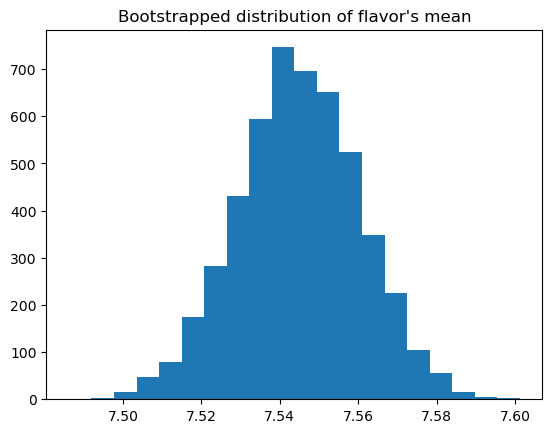

In [71]:
plt.hist(bootstrap_dist, bins=20)
plt.title("Bootstrapped distribution of flavor's mean")
plt.show()

Teraz policzymy średnią z flavor z próbki `coffee_sample`, gdzie $n=500$, z której robiliśmy bootstrapped datasets.

In [72]:
coffee_sample["flavor"].mean()

7.545

Teraz policzymy średnią z 5000 średnich, które tworzą bootstrapped distribution

In [73]:
np.mean(bootstrap_dist)

7.544811220000001

**Obie wartości są bardzo podobne !!**

### Ale jest problem!

Średnia z kolumny flavor dla całej populacji (`coffee_ratings`) jest nieco inna:

In [74]:
coffee_ratings["flavor"].mean()

7.526046337817639

**Ta sytuacja jest typowa! Średnia z bootstrapped distribution jest zazwyczaj prawie identyczna jak średnia z oryginalnej próbki, z której tworzyliśmy bootstrapped datasets (czyli prawie identyczna jak średnia z flavor z `coffee_sample`).**
### Ale to nie zawsze jest dobre!
**Jeśli próbka (`coffee_sample`) nie jest reprezentatywną próbą populacji, średnia z bootstrapped distribution nie będzie dobrym oszacowaniem średniej z populacji!!**
### Bootstrapping nie naprawi żadnego potencjalnego bias, które pojawiło się podczas pobierania próby (czyli `coffee_sample`).
### Ale zawsze możemy policzyć odchylenia standardowe :)))

In [75]:
coffee_sample["flavor"].std() # pandas .std() liczy by default a sample std

0.35167705854521447

In [76]:
# teraz std dla bootstarpped distribution
np.std(bootstrap_dist, ddof=1)

0.015570419545553842

Dostaliśmy totalnie inne wyniki? 
### Czemu? O co chodzi?

ale **standard error is the standard deviation of the statistic of interest**

In [77]:
standard_error = np.std(bootstrap_dist, ddof=1)

In [78]:
standard_error * np.sqrt(500) # 500 czyli coffee_sample size

0.34816516542049775

**Standard error times square root of sample size estimates the population standard deviation.**

Prawdziwe odchylenie standardowe populacji (`coffee_ratings`):

In [79]:
coffee_ratings["flavor"].std(ddof=0)

0.3412548122462262

To oszacowanie `standard_error * np.sqrt(500)` jest lepsze niż wyznaczenie odchylenia standardowego z próby `coffee_sample["flavor"].std()`

# To recap:
**The estimated standard error is the standard deviation of the bootstrap distribution values for our statistic of interest. This estimated standard error times the square root of the sample size gives a really good estimate of the standard deviation of the population.**
**That is, although bootstrapping was poor at estimating the population mean, it is generally great for estimating the population standard deviation.**
### To teraz przedziały ufności
#### *Quantile method*
Z rozkładu bootstrapowego obliczamy kwantyle 0.025 i 0.975. Tyle. To działa, bo bootstrap reprezentuje potencjalny rozkład wybranej statystyki, gdybyśmy wielokrotnie ją wyznaczali (rozkład bootstrapowy aproksymuje rozkład próbkowania danej statystyki — czyli to, jak zmieniałaby się jej wartość przy wielokrotnym losowaniu prób z populacji), czyli dokładnie to, o co chodzi w przedziale ufności.

In [80]:
lower_quantile_method = np.quantile(bootstrap_dist, 0.025)
upper_quantile_method = np.quantile(bootstrap_dist, 0.975)
print(lower_quantile_method, upper_quantile_method)

7.513637500000001 7.574766


#### *Standard error method*
Inverse cumulative distribution function, czyli odwrotność dystrybuanty
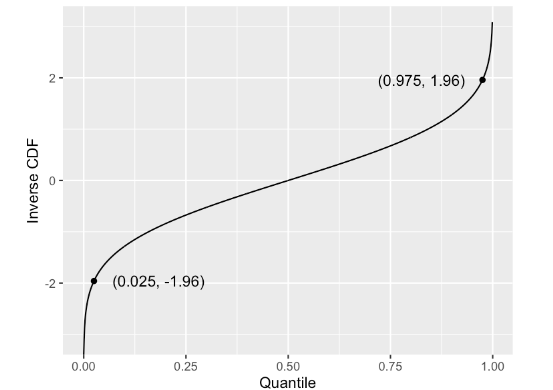

`norm.ppf(quantile, loc=0, scale=1)`

In [81]:
point_estimate = np.mean(bootstrap_dist)
std_error = np.std(bootstrap_dist, ddof=1)
print(point_estimate, std_error)

7.544811220000001 0.015570419545553842


In [82]:
lower_std_error_method = norm.ppf(0.025, loc=point_estimate, scale=std_error)
upper_std_error_method = norm.ppf(0.975, loc=point_estimate, scale=std_error)
print(lower_std_error_method, upper_std_error_method)

7.514293758466536 7.575328681533465


Czy wyniki uzyskane w obu metodach są identyczne?

In [83]:
lower_quantile_method == lower_std_error_method

False

In [84]:
upper_quantile_method == upper_std_error_method

False

Nie, nie są identyczne. Wynika to z tego, że bootstrap distribution jest zbliżony do rozkładu normalnego, z którego liczone są kwantyle (jest zbliżony, a nie ma dokładnie rozkład normalny).